   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-n

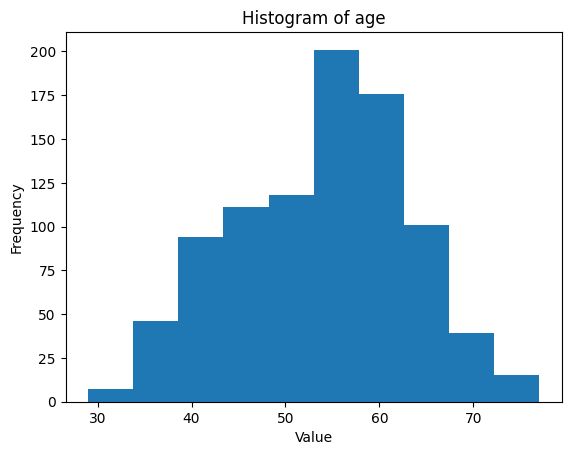

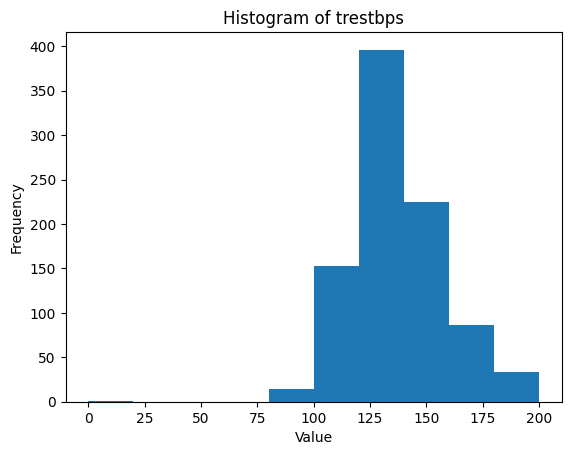

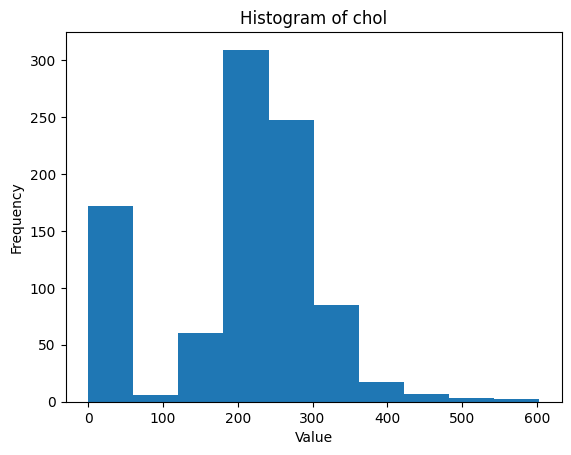

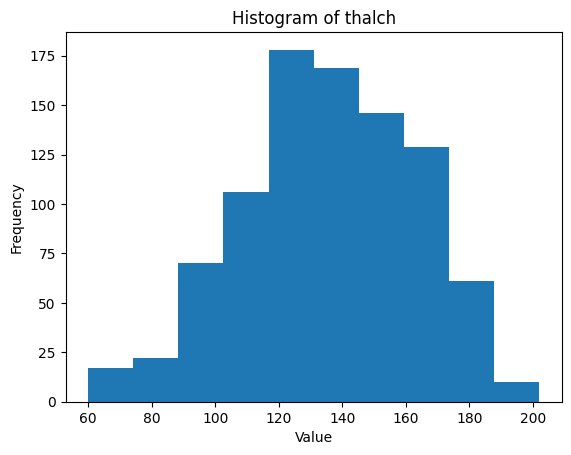

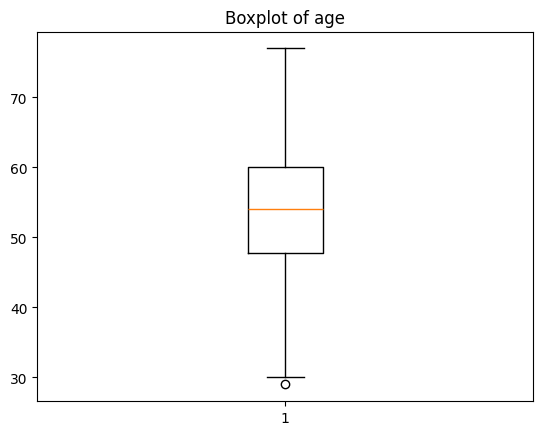

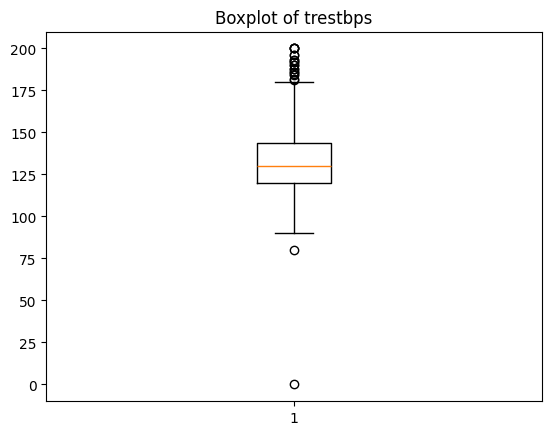

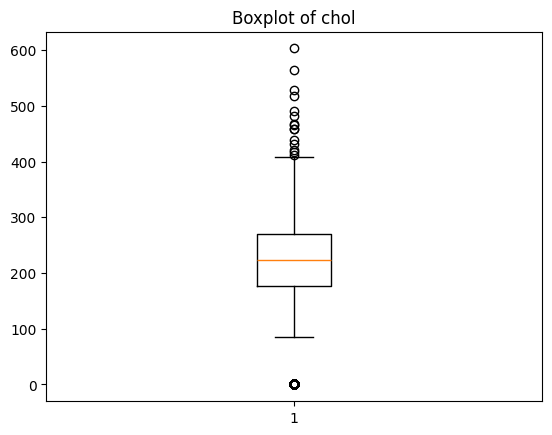

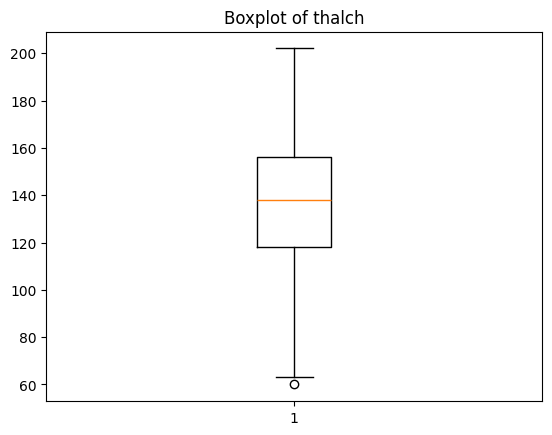

               age  trestbps      chol    thalch   oldpeak       num
age       1.000000  0.253999 -0.099967 -0.328088  0.242662  0.326493
trestbps  0.253999  1.000000  0.117488 -0.133360  0.167131  0.137251
chol     -0.099967  0.117488  1.000000  0.197907  0.029898 -0.238813
thalch   -0.328088 -0.133360  0.197907  1.000000 -0.139598 -0.323058
oldpeak   0.242662  0.167131  0.029898 -0.139598  1.000000  0.437577
num       0.326493  0.137251 -0.238813 -0.323058  0.437577  1.000000


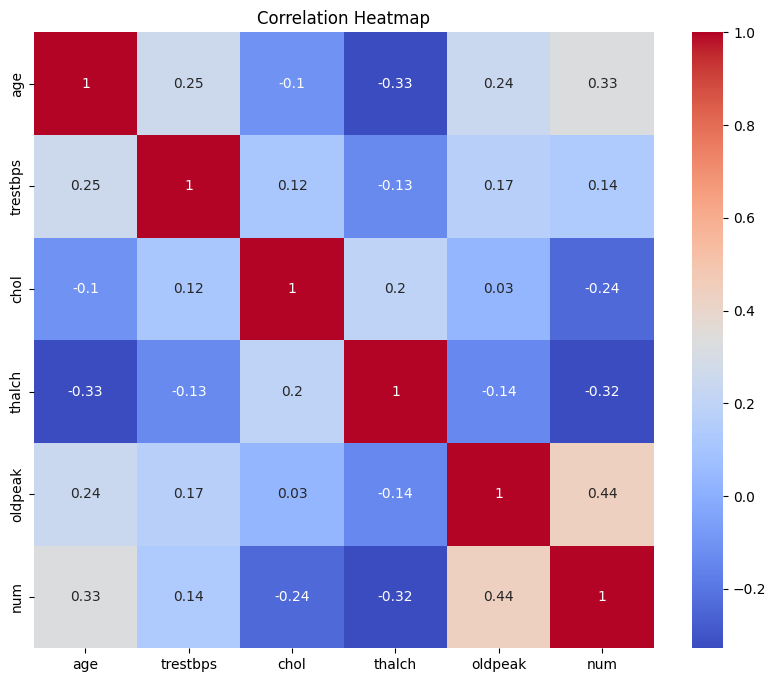

(726, 9)
(182, 9)
(726,)
(182,)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


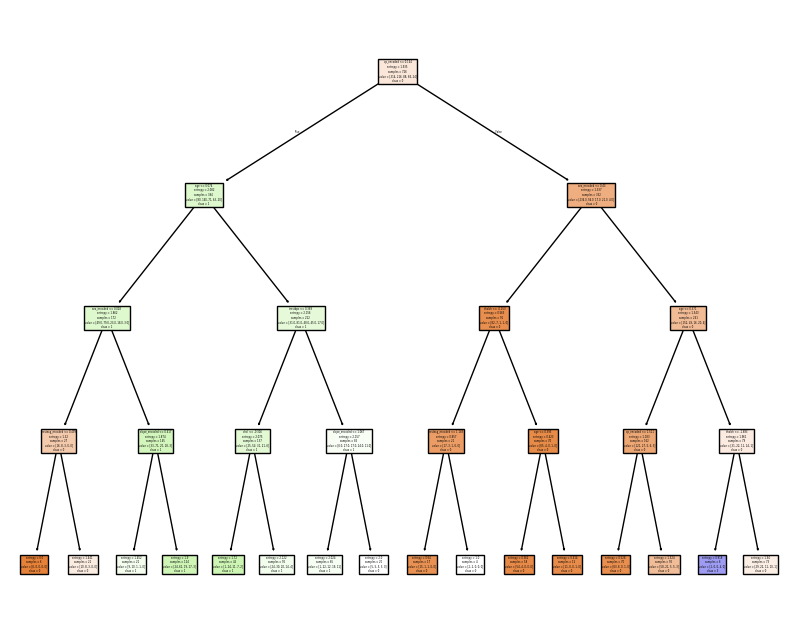

In [1]:
#Import necessary libraries
#Decision Tree
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree

#Load data
df = pd.read_excel('/content/new_heart_disease.xlsx')

#View the first few rows
print(df.head())

#Get information about the dataset
print(df.info())

#Check for missing values
print(df.isnull().sum())

#Check for duplicates
print(df.duplicated().sum())

#Print value counts for categorical columns
for col in df.select_dtypes(include=['object']):
    print(f"Value count for {col}:")
    print(df[col].value_counts())
    print("\n")

#Print summary statistics for numerical columns
for col in df.select_dtypes(include=['int64', 'float64']):
    print(f"Summary Statistics for {col}:")
    print(df[col].describe())
    print("\n")

#Plot histograms for selected columns
columns_to_plot = ['age', 'trestbps', 'chol', 'thalch']
for column in columns_to_plot:
    plt.hist(df[column], bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

#Plot boxplots for selected columns
for column in columns_to_plot:
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

#Calculate the correlation matrix
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
print(corr_matrix)


#Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Encode categorical variables using LabelEncoder
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])
df['cp_encoded'] = le.fit_transform(df['cp'])
df['restecg_encoded'] = le.fit_transform(df['restecg'])
df['slope_encoded'] = le.fit_transform(df['slope'])
df['thal_encoded'] = le.fit_transform(df['thal'])

#Scale numerical variables using StandardScaler
scaler = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalch']] = scaler.fit_transform(df[['age', 'trestbps', 'chol', 'thalch']])

#Fill missing values with 0
df = df.fillna(0)

#Split the data into features and target
features = df[['age', 'trestbps', 'chol', 'thalch', 'sex_encoded', 'cp_encoded', 'restecg_encoded', 'slope_encoded', 'thal_encoded']]
target = df['num']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=100)

#Print the shapes of the training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Train a decision tree classifier
dec_tree = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=3)
dec_tree.fit(X_train, y_train)

#Make predictions on the test set
y_pred = dec_tree.predict(X_test)

#Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


#Perform grid search to find the best parameters
params = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [1, 2, 3, 4, 5, 6]}
grid_search = GridSearchCV(dec_tree, params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt = DecisionTreeClassifier(**best_params, random_state=100)
best_dt.fit(X_train, y_train)

#Plot the decision tree
plt.figure(figsize=(10,8))
plot_tree(best_dt, feature_names=features.columns, class_names=['0', '1', '2', '3', '4'], filled=True)
plt.show()
